<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/03-01-02-08-02-tree-based-models-bagging-grf-causal-forest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 2.8.2 Causal Forest (CF)

This tutorial provides an overview of **Causal Forests** (CF) within the Generalized Random Forests (GRF) framework, focusing on estimating heterogeneous treatment effects in observational or experimental data. It includes a step-by-step guide to implementing Causal Forests using the `{ecoml}` package in Python, with practical examples and explanations tailored to the `lung` dataset.

## Overview

A **Causal Forest** is a machine learning method within the Generalized Random Forests (GRF) framework, designed to estimate **heterogeneous treatment effects** in observational or experimental data studies. Specifically, it estimates the **Conditional Average Treatment Effect (CATE)**, which measures how the effect of a treatment varies across individuals based on their characteristics (covariates). It builds on the random forest algorithm but adapts it for causal inference, focusing on estimating causal effects rather than just predicting outcomes. Causal forests are particularly useful in fields like healthcare, economics, and social sciences, where understanding how different subgroups respond to treatments or interventions is crucial. They can handle complex interactions between covariates and treatment effects, making them a powerful tool for causal analysis.




### Key Concepts

-   `Treatment Effect`: The difference in outcomes between a treated and untreated state for an individual, often denoted as

$$ \tau(x) = E[Y(1) - Y(0) | X = x] $$

where:

-   $Y(1)$: Outcome if treated.

-   $Y(0)$: Outcome if not treated.

-   $X$: Covariates (e.g., age, sex, income).

-   $\tau(x)$: CATE, the expected treatment effect for individuals with covariates $X = x$.

-   `Heterogeneity`: Causal forests identify how treatment effects differ across subgroups defined by covariates (e.g., a drug may work better for older patients).

-   `Random Forest Foundation`: Like standard random forests, causal forests use an ensemble of decision trees, but the trees are constructed to optimize for treatment effect estimation rather than prediction accuracy.


### How Causal Forests Work

1.  Data Requirements

-   Outcome ($Y$): The variable of interest (e.g., survival time, test score).

-   Treatment ($W$): A binary or continuous variable indicating treatment status (e.g., 1 = treated, 0 = control).

-   Covariates ($X$) : Features that may influence the treatment effect (e.g., age, gender).

2.  Tree Construction

-   Each tree is grown on a random subset of the data and features, similar to random forests.

-   Splits are chosen to maximize **heterogeneity in treatment effects** rather than prediction accuracy. For example, a split might separate patients into groups where the treatment effect (difference in $Y$ between treated and control) is significantly different.

-   The splitting criterion often uses a measure like the variance of treatment effects or a modified mean squared error tailored o causal inference.

3.  Honest Estimation

-   To reduce overfitting, causal forests use “honest” estimation: one subset of data builds the tree structure (determines splits), and another subset estimates treatment effects within each leaf.

-   This ensures unbiased estimates of $\tau(x)$ within each subgroup defined by the tree.

4.  Aggregation

-   Treatment effect estimates from all trees are averaged to produce a robust estimate of $\tau(x)$ for each individual or covariate combination.

-   The forest provides a smooth, non-parametric estimate of how treatment effects vary with covariates.

5.  Output

-   CATE Estimates: $\tau(x)$, the estimated treatment effect for

-   each individual based on their covariates.

-   Average Treatment Effect (ATE): The average of $\tau(x)$ across the population, $E[\tau(X)]$.

-   Variable Importance: Identifies which covariates most influence heterogeneity in reatment effects.


## Orthogonal Random Forest and Causal Forest

Causal Forests and Generalized Random Forests are a flexible method for estimating treatment effect heterogeneity with Random Forests. Orthogonal Random Forest (ORF) combines orthogonalization, a technique that effectively removes the confounding effect in two-stage estimation, with generalized random forests.



**Causal Forest DML (`CausalForestDML`)**:

- **Overview**: Causal Forest DML is a machine learning method for estimating heterogeneous treatment effects, extending random forests to causal inference. It estimates the Conditional Average Treatment Effect (CATE), $\tau(X) = E[Y(1) - Y(0) | X = x]$, where $Y(1)$ and $Y(0)$ are potential outcomes under treatment and control, and \( X \) are covariates. It combines Random Forests with Double Machine Learning (DML) to handle confounding variables.

- **How It Works**:

  - **Random Forest Structure**: Builds an ensemble of trees, where each tree splits the feature space to maximize heterogeneity in treatment effects (rather than just predicting outcomes).
  - **Double Machine Learning**: Uses DML to adjust for confounding. It fits nuisance models for the outcome (\( Y \)) and treatment (\( W \)) using flexible machine learning models (e.g., `LassoCV`), then estimates CATE on the residuals. This reduces bias from confounding variables.
  - **Key Assumption**: Unconfoundedness (treatment assignment is independent of potential outcomes given covariates).
  - **Use Case**: Ideal for datasets with many covariates, complex relationships, and randomized or observational data with unconfoundedness.
- **Strengths**:
  - Handles high-dimensional data and non-linear relationships.
  - Robust to overfitting due to ensemble methods.
  - Provides feature importance to identify variables driving treatment effect heterogeneity.
- **Limitations**:
  - Computationally intensive with large datasets or many trees.
  - Requires sufficient sample size for reliable CATE estimates.
  - Assumes unconfoundedness, which may not hold in some observational studies.

**Ortho Forest (DMLOrthoForest)**

- **Overview**: Ortho Forest, implemented as `DMLOrthoForest` in `econml`, is an advanced method for estimating CATE, combining DML with orthogonal random forests. It builds on the Generalized Random Forest (GRF) framework to provide robust and efficient treatment effect estimation.

- **How It Works**:

  - **Orthogonalization**: Like Causal Forest DML, it uses DML to estimate nuisance functions (outcome and treatment models) to remove confounding bias. However, it employs a more sophisticated orthogonalization process to ensure that the treatment effect estimation is robust to nuisance model misspecification.
  - **Generalized Random Forest**: Uses GRF to estimate CATE by solving a local moment condition at each point in the feature space. Splits are chosen to maximize heterogeneity in treatment effects, similar to Causal Forest, but with a focus on local linear approximations.
  - **Adaptive Estimation**: Balances bias and variance by adaptively weighting observations, improving efficiency in small samples or high-dimensional settings.
  - **Key Assumption**: Unconfoundedness, like Causal Forest DML.
- **Strengths**:
  - More robust to nuisance model misspecification than Causal Forest DML.
  - Efficient in small samples or high-dimensional settings due to adaptive weighting.
  - Provides confidence intervals for CATE estimates, enhancing interpretability.
- **Limitations**:
  - More complex and computationally intensive than Causal Forest DML.
  - Requires careful tuning of parameters (e.g., `min_var_fraction_leaf`, `n_estimators`).
  - May be less interpretable for feature importance compared to Causal Forest DML.

**Key Differences**

| Aspect                     | Causal Forest DML (`CausalForestDML`) | Ortho Forest (`DMLOrthoForest`) |
|----------------------------|--------------------------------------|---------------------------------|
| **Methodology**            | Random Forest + DML                 | Generalized Random Forest + DML |
| **Nuisance Model Handling** | Standard DML with separate outcome and treatment models | Orthogonalized DML with robust nuisance estimation |
| **Splitting Criterion**    | Maximizes treatment effect heterogeneity | Solves local moment conditions for CATE |
| **Efficiency**             | Less efficient in small samples or high dimensions | More efficient due to adaptive weighting |
| **Robustness**             | Sensitive to nuisance model misspecification | More robust to misspecification |
| **Confidence Intervals**   | Available via `effect_interval` | Natively supported with better coverage |
| **Computational Complexity** | Moderate | Higher due to GRF framework |
| **Feature Importance**     | Directly available via `feature_importances_` | Less straightforward, requires additional computation |

**When to Use**
- **Causal Forest DML**: Use for larger datasets, when computational simplicity is preferred, or when feature importance is a priority. Suitable for randomized controlled trials or observational data with strong unconfoundedness.
- **Ortho Forest**: Use for smaller datasets, high-dimensional settings, or when robustness to nuisance model misspecification is critical. Ideal when precise confidence intervals are needed.







In [ ]:
!pip install econml
!pip install scikit-survival

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from econml.orf import DMLOrthoForest, DROrthoForest
from econml.dml import CausalForestDML
from econml.sklearn_extensions.linear_model import WeightedLassoCVWrapper, WeightedLasso
from sksurv.datasets import load_veterans_lung_cancer

In [ ]:
# Custom function to calculate Rank-Weighted Average Treatment Effect (AUTOC)
def calculate_rate(cate_estimates, weights=None):
    """
    Calculate the Rank-Weighted Average Treatment Effect (AUTOC).

    Parameters:
    - cate_estimates: Array of predicted CATE values.
    - weights: Optional array of weights for each observation (default: uniform).

    Returns:
    - autoc: Area Under the Targeting Operating Characteristic.
    """
    n = len(cate_estimates)
    if weights is None:
        weights = np.ones(n) / n  # Uniform weights
    sorted_indices = np.argsort(cate_estimates)[::-1]
    sorted_cate = cate_estimates[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weights = np.cumsum(sorted_weights)
    cumulative_effects = np.cumsum(sorted_cate * sorted_weights)
    autoc = np.sum(cumulative_effects) / np.sum(sorted_weights)
    return autoc

#### Data

In [ ]:
# Load and preprocess the veterans_lung_cancer dataset
data_x, data_y = load_veterans_lung_cancer()
df_x = pd.DataFrame(data_x)

# Inspect field names
print("data_y field names:", data_y.dtype.names)
print("Feature column names:", df_x.columns)

# Recode treatment: 'standard' -> 0, 'test' -> 1
df_x['Treatment'] = df_x['Treatment'].map({'standard': 0, 'test': 1})
# Recode Prior_therapy: 'no' -> 0, 'yes' -> 1
df_x['Prior_therapy'] = df_x['Prior_therapy'].map({'no': 0, 'yes': 1})
# One-hot encode Celltype
df_x = pd.get_dummies(df_x, columns=['Celltype'], drop_first=True)

# Define features (X), treatment (W), and outcome (Y)
X = df_x[['Age_in_years', 'Karnofsky_score', 'Months_from_Diagnosis', 'Prior_therapy',
          'Celltype_large', 'Celltype_smallcell', 'Celltype_squamous']]
W = df_x['Treatment']
Y = data_y['Survival_in_days']

# Verify dtypes
print("Feature dtypes:\n", X.dtypes)

# Split data into train and test sets (80-20 split)
X_train, X_test, Y_train, Y_test, W_train, W_test = train_test_split(
    X, Y, W, test_size=0.2, random_state=42
)

### Train Causal Forest on Training Data

This code trains a Causal Forest model using the `CausalForestDML` class from the `econml.dml` module. It is combined with Double Machine Learning (DML)-based residualization of the treatment and outcome variables.

Here's a breakdown:

-   `cf = CausalForestDML(...)`: This line initializes the Causal Forest model.

    -   `model_y=LassoCV()`: Specifies the model used to estimate the outcome (Y) as a function of the features (X). Here, it uses `LassoCV`, which is a Lasso linear model with cross-validation to find the best regularization parameter.

    -   `model_t=LassoCV()`: Specifies the model used to estimate the treatment (W) as a function of the features (X). It also uses `LassoCV`.

    -   `n_estimators=1000`: Sets the number of trees in the forest to 1000.

    -   `min_var_fraction_leaf=0.05`: This is a parameter that influences how trees are grown, related to the minimum variance required in a leaf node.

    -   `random_state=42`: Sets a random seed for reproducibility.

-   `cf.fit(Y_train, W_train, X=X_train)`: This line fits the Causal Forest model to the training data.

    -   `Y_train`: The outcome variable for the training set.

    -   `W_train`: The treatment variable for the training set.

    -   `X=X_train`: The feature variables for the training set.

The `fit` method trains the forest to estimate the Conditional Average Treatment Effect (CATE) based on the provided training data.

In [49]:
# Train Causal Forest DML
cf_dml = CausalForestDML(
    model_y=LassoCV(),
    model_t=LassoCV(),
    n_estimators=1000,
    min_var_fraction_leaf=0.05,
    random_state=42
)
cf_dml.fit(Y_train, W_train, X=X_train)

In [50]:
cf_dml.summary()

Population summary results are available only if `cache_values=True` at fit time!
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!


The **ATE** is the average treatment effect (in days of survival) across the training population, with a 95% confidence interval.

#### Predict CATE on Test Data

In [51]:
# Predict CATE on test set
cate_test_cf = cf_dml.effect(X_test)
cate_test_cf


array([-1.96481174, -7.85862914, 20.75054529, -6.37266705,  2.56107206,
        7.86875668, 22.61399986,  2.64347628,  9.60227149, 36.81715226,
       23.43296362, -1.07117493, 39.02186919, 29.96578389, 11.01521802,
       -0.15471485,  5.43951297,  8.5343926 , 18.14963601,  2.03528349,
        3.11595426, 38.15917439, 13.95949614,  0.42145945, -1.21248852,
       12.99974854,  5.75481764, 13.99071613])

In [39]:
te_lower2, te_upper2 = cf.effect_interval(X_test)

#### Rank-Weighted Average Treatment Effect (RATE)

The `rank_average_treatment_effect()` function in the {grf} package computes the AUTOC and provides a 95% confidence interval (CI) for it, allowing you to quantify the uncertainty of the treatment effect heterogeneity


Rank-Weighted Average Treatment Effect (AUTOC): 261.180


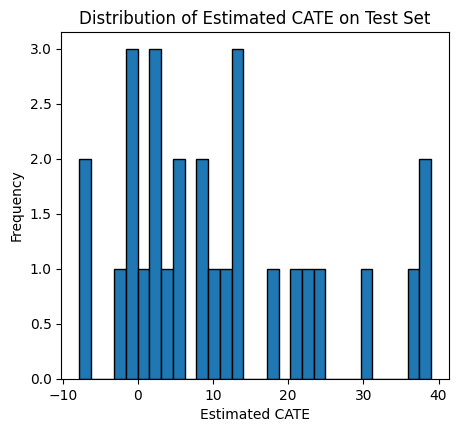

In [52]:
# Calculate RATE (AUTOC)
autoc = calculate_rate(cate_test_cf)
print(f"Rank-Weighted Average Treatment Effect (AUTOC): {autoc:.3f}")

# Plot histogram of CATE estimates
plt.figure(figsize=(5, 4.5))
plt.hist(cate_test, bins=30, edgecolor='black')
plt.xlabel('Estimated CATE')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated CATE on Test Set')
plt.show()

#### Variable Importance

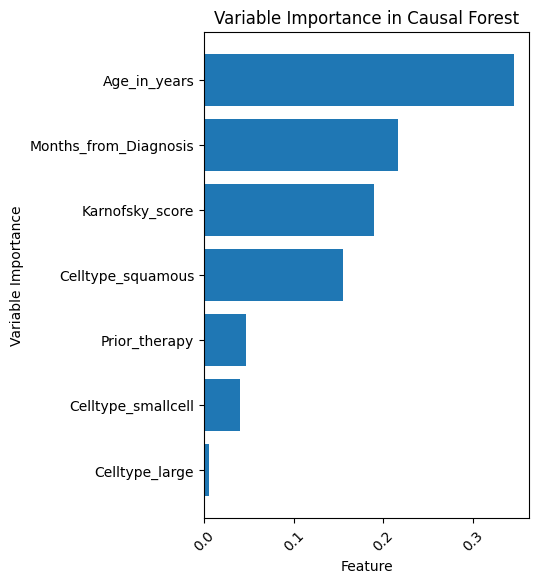

In [53]:
# Calculate variable importance
var_imp = cf_dml.feature_importances_
var_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': var_imp
}).sort_values(by='Importance', ascending=True)

# Plot variable importance
plt.figure(figsize=(5.5, 6))
plt.barh(var_imp_df['Feature'], var_imp_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Variable Importance')
plt.title('Variable Importance in Causal Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Train Ortho Forest on Training Data

In [54]:
# Train Ortho Forest
ortho_forest = DMLOrthoForest(
    model_Y=LassoCV(),
    model_T=LassoCV(),
    n_trees=1000,  # Corrected from n_estimators to n_trees
    min_leaf_size=5,  # Replaced min_var_fraction_leaf with min_leaf_size
    random_state=42
)
ortho_forest.fit(Y_train, W_train, X=X_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 997 out of 1000 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.5s finished


In [56]:
cate_test_ortho = ortho_forest.effect(X_test)
cate_test_ortho

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.9s finished


array([-9.50662906e+01, -2.21759228e+01,  1.21198905e+01, -2.20136980e+01,
       -2.06974780e+01, -5.48500455e+01,  7.26283455e-02, -1.51239513e+01,
       -2.91910535e+01,  5.93379762e+01, -2.00600582e+01, -4.04468441e+01,
        1.03178063e+02, -4.30299317e+00,  1.61027719e+01, -6.33333181e+01,
       -4.07143099e+00, -2.81600126e+01, -3.94237996e+00, -7.49000792e+01,
       -6.64959100e+01,  9.95617256e+01,  3.34860979e+01, -5.99298875e+01,
       -4.01926559e+01,  1.70504466e+01, -6.04403461e+01,  4.86335805e+01])

In [57]:
# Calculate RATE (AUTOC)
autoc_ortho = calculate_rate(cate_test_ortho)
print(f"Ortho Forest AUTOC: {autoc_ortho:.3f}")

Ortho Forest AUTOC: 196.613


### Performance Visualization

- CATE Histogram`: Plots histograms of CATE estimates for both models to compare their distributions.
- `CATE vs. Karnofsky Score: Scatter plot of CATE estimates against Karnofsky_score to visualize how treatment effects vary with a key covariate.

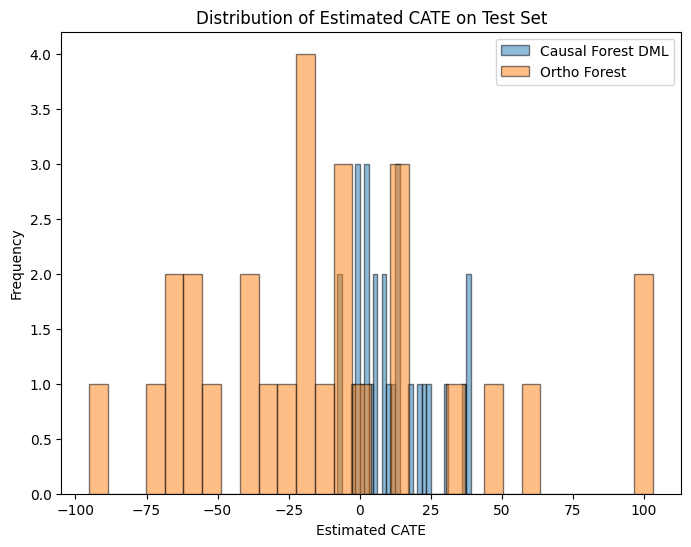

In [58]:
# Performance visualization: Histogram of CATE estimates
plt.figure(figsize=(8, 6))
plt.hist(cate_test_cf, bins=30, alpha=0.5, label='Causal Forest DML', edgecolor='black')
plt.hist(cate_test_ortho, bins=30, alpha=0.5, label='Ortho Forest', edgecolor='black')
plt.xlabel('Estimated CATE')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated CATE on Test Set')
plt.legend()
plt.show()

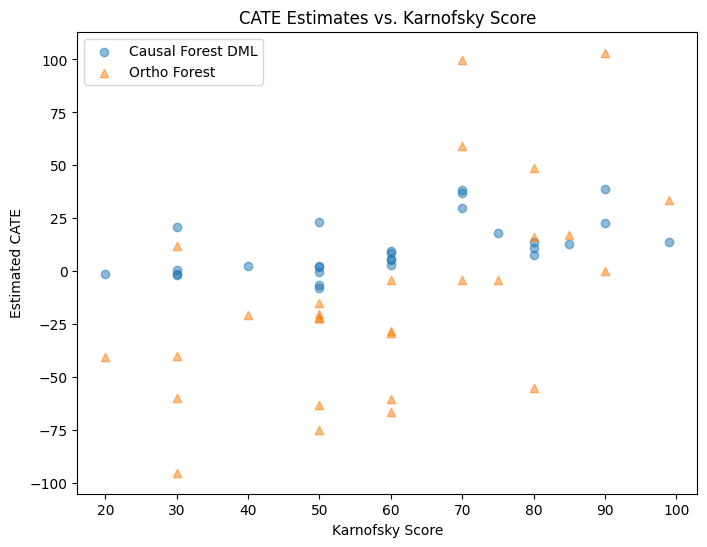

In [59]:
# Performance visualization: CATE vs. Karnofsky Score
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Karnofsky_score'], cate_test_cf, alpha=0.5, label='Causal Forest DML', marker='o')
plt.scatter(X_test['Karnofsky_score'], cate_test_ortho, alpha=0.5, label='Ortho Forest', marker='^')
plt.xlabel('Karnofsky Score')
plt.ylabel('Estimated CATE')
plt.title('CATE Estimates vs. Karnofsky Score')
plt.legend()
plt.show()

## Summary and Conclusion

This notebook provides a tutorial on implementing Causal Forests and Ortho Forests using the `econml` package in Python for estimating heterogeneous treatment effects, using the `veterans_lung_cancer` dataset as an example.

The tutorial covers:

-   An overview of Causal Forests within the Generalized Random Forests (GRF) framework and key concepts like Treatment Effect, Heterogeneity, and Honest Estimation.

-   A comparison of Causal Forest DML and Ortho Forest (DMLOrthoForest), highlighting their methodologies, strengths, and limitations.

-   Loading and preprocessing the `veterans_lung_cancer` dataset, including recoding and one-hot encoding categorical variables.

-   Training both Causal Forest DML and Ortho Forest models on the training data.

-   Predicting Conditional Average Treatment Effects (CATE) on the test set using both models.

-   Calculating and comparing the Rank-Weighted Average Treatment Effect (AUTOC) for both models.

-   Visualizing the variable importance for the Causal Forest model.

-   Visualizing the performance of both models through histograms of CATE estimates and scatter plots of CATE estimates against the Karnofsky Score.

In conclusion, the notebook successfully demonstrates the application of Causal Forests and Ortho Forests for estimating heterogeneous treatment effects. The results show the estimated CATE values, the variable importance in the Causal Forest model, and a comparison of the distribution of CATE estimates and their relationship with the Karnofsky Score for both models. The AUTOC values provide a quantitative measure of the treatment effect heterogeneity captured by each model.

## References

- EconML Documentation: https://econml.azurewebsites.net/
- Scikit-Survival Documentation: https://scikit-survival.readthedocs.io/
- Wager, S., & Athey, S. (2018). Estimation and Inference of Heterogeneous Treatment Effects using Random Forests. *Journal of the American Statistical Association*, 113(523), 1228–1242.
- Athey, S., Tibshirani, J., & Wager, S. (2019). Generalized Random Forests. *Annals of Statistics*, 47(2), 1148–1178.

